<a href="https://colab.research.google.com/github/aasharib/CV_Assignment_3/blob/main/CV_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
DATASET_ZIP_PATH_DRIVE = '/content/drive/MyDrive/Semester1/CV/Assignment/3/intel-image-classification.zip'
DATASET_PATH_LOCAL = '/content/assgn3'
TRAIN_DATASET_PATH = DATASET_PATH_LOCAL + '/intel-image-classification/seg_train/seg_train'
VALIDATION_DATASET_PATH = DATASET_PATH_LOCAL + '/intel-image-classification/seg_test/seg_test'
TEST_DATASET_PATH = DATASET_PATH_LOCAL + '/intel-image-classification/seg_pred/seg_pred'
NUMBER_OF_EPOCHS = 60
INITIAL_LEARNING_RATE = 0.01
BATCH_SIZE = 256


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -q $DATASET_ZIP_PATH_DRIVE -d $DATASET_PATH_LOCAL

replace /content/assgn3/intel-image-classification/seg_pred/seg_pred/buildings/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [4]:
from sklearn.datasets import load_files
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
trainData = load_files(TRAIN_DATASET_PATH ,load_content=False)
validationData = load_files(VALIDATION_DATASET_PATH , load_content=False)
testData = load_files(TEST_DATASET_PATH, load_content=False)

In [6]:
trainData

{'DESCR': None,
 'filenames': array(['/content/assgn3/intel-image-classification/seg_train/seg_train/glacier/6416.jpg',
        '/content/assgn3/intel-image-classification/seg_train/seg_train/buildings/5658.jpg',
        '/content/assgn3/intel-image-classification/seg_train/seg_train/street/7656.jpg',
        ...,
        '/content/assgn3/intel-image-classification/seg_train/seg_train/sea/13907.jpg',
        '/content/assgn3/intel-image-classification/seg_train/seg_train/sea/3467.jpg',
        '/content/assgn3/intel-image-classification/seg_train/seg_train/forest/14133.jpg'],
       dtype='<U82'),
 'target': array([2, 0, 5, ..., 4, 4, 1]),
 'target_names': ['buildings',
  'forest',
  'glacier',
  'mountain',
  'sea',
  'street']}

In [7]:
trainDataLabel = trainData.target

In [8]:
def readAndPreprocessImage(imgFile):
    curImg = np.asarray(Image.open(imgFile).resize((150,150)))
    if curImg is not None:
        #print("Done", imgFile)
        return curImg 

In [9]:
trainDataImgArr = np.array(list(map(readAndPreprocessImage, trainData.filenames)))

In [10]:
(trainingDataImgX, validationDataImgX, trainingDataLabelY, validationDataLabelY) = train_test_split(trainDataImgArr, trainDataLabel, test_size=0.2, random_state=42)

2
3


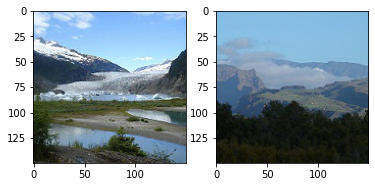

In [11]:

fig, ax = plt.subplots(1,2,figsize=(6,6))
ax[0].imshow(trainingDataImgX[0])
ax[1].imshow(trainingDataImgX[1])
print(trainingDataLabelY[0])
print(trainingDataLabelY[1])

In [12]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

mmodel = Sequential()
mmodel.add(Conv2D(64, kernel_size=3, padding='same', activation='relu',
                 input_shape=(150, 150, 3)))
mmodel.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
mmodel.add(MaxPooling2D(pool_size=2, strides=2))
mmodel.add(Dropout(0.2))

mmodel.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
mmodel.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
mmodel.add(MaxPooling2D(pool_size=2, strides=2))
mmodel.add(Dropout(0.2))

mmodel.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
mmodel.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
mmodel.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
mmodel.add(MaxPooling2D(pool_size=2, strides=2))
mmodel.add(Dropout(0.2))

mmodel.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
mmodel.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
mmodel.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
mmodel.add(MaxPooling2D(pool_size=2, strides=2))
mmodel.add(Dropout(0.2))

mmodel.add(Conv2D(512, kernel_size=3, activation='relu'))
mmodel.add(Conv2D(512, kernel_size=3, activation='relu'))
mmodel.add(Conv2D(512, kernel_size=3, activation='relu'))
mmodel.add(MaxPooling2D(pool_size=2, strides=2))
mmodel.add(Dropout(0.2))

mmodel.add(Flatten())

mmodel.add(Dense(4096, activation='relu'))
mmodel.add(Dense(4096, activation='relu'))
mmodel.add(Dense(4096, activation='relu'))

# 6 classes to predict
mmodel.add(Dense(6, activation='softmax'))

In [13]:
#mmodel.summary()

In [14]:
# import tensorflow as tf
# from keras.callbacks import LearningRateScheduler
# def epochCallBack(epoch, lr):
#     if epoch < 20:
#       print(lr)
#       return lr
#     else:
#       print(lr)
#       return lr * tf.math.exp(-0.1)

# callback = LearningRateScheduler(epochCallBack)
  

In [15]:
from keras.optimizers import SGD
sgd = SGD(lr=INITIAL_LEARNING_RATE, momentum=0.9, decay=INITIAL_LEARNING_RATE / NUMBER_OF_EPOCHS)
mmodel.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [16]:
trainingDataLabelY[0]

2

In [17]:
from keras.utils import to_categorical
trainingDataLabelOHE = to_categorical(trainingDataLabelY)
validationDataLabelOHE = to_categorical(validationDataLabelY)

In [18]:
trainingDataLabelOHE[0]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
imgDataAugmenter = ImageDataGenerator(
    horizontal_flip=True,
		rotation_range=15,
		zoom_range=0.2,
		shear_range=0.15,
		fill_mode="nearest")

In [20]:
H = mmodel.fit(x=imgDataAugmenter.flow(trainingDataImgX, trainingDataLabelOHE, batch_size=BATCH_SIZE), epochs=NUMBER_OF_EPOCHS, validation_data=(validationDataImgX, validationDataLabelOHE))


Epoch 1/60
44/44 [==============================] - 114s 2s/step - loss: 1.7864 - accuracy: 0.1998 - val_loss: 1.7929 - val_accuracy: 0.1760
Epoch 2/60
44/44 [==============================] - 88s 2s/step - loss: 1.7790 - accuracy: 0.2026 - val_loss: 1.7803 - val_accuracy: 0.1977
Epoch 3/60
44/44 [==============================] - 88s 2s/step - loss: 1.7451 - accuracy: 0.2445 - val_loss: 1.6101 - val_accuracy: 0.3880
Epoch 4/60
44/44 [==============================] - 88s 2s/step - loss: 1.6353 - accuracy: 0.3627 - val_loss: 1.8350 - val_accuracy: 0.1760
Epoch 5/60
44/44 [==============================] - 88s 2s/step - loss: 1.6910 - accuracy: 0.3032 - val_loss: 1.4680 - val_accuracy: 0.4585
Epoch 6/60
44/44 [==============================] - 88s 2s/step - loss: 1.6664 - accuracy: 0.3127 - val_loss: 1.9021 - val_accuracy: 0.1760
Epoch 7/60
44/44 [==============================] - 89s 2s/step - loss: 1.8573 - accuracy: 0.1677 - val_loss: 1.7434 - val_accuracy: 0.2333
Epoch 8/60
44/44 [=

In [21]:
# save the model's trained weights
mmodel.save_weights('vgg16_trained_normal_vgg_2ndJan_2pm.h5')

In [22]:
!cp /content/vgg16_trained_normal_vgg_2ndJan_2pm.h5 /content/drive/MyDrive/Semester1/CV/Assignment/3

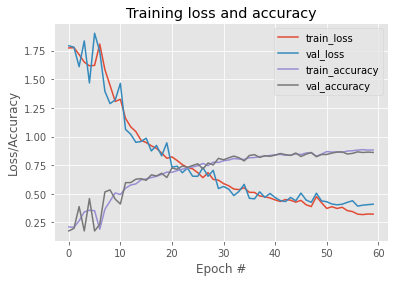

In [24]:
import matplotlib.pyplot as plt
N = np.arange(0, NUMBER_OF_EPOCHS)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [25]:
testData
testDataImgArr = np.array(list(map(readAndPreprocessImage, testData.filenames)))
testDataLabel = testData.target
testDataLabelOHE = to_categorical(testDataLabel)

In [26]:
'''CONFUSION MATRIX'''
# Making prediction
predicatedTestDataY = mmodel.predict_classes(testDataImgArr)
actualTestDataY = np.argmax(testDataLabelOHE, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(actualTestDataY, predicatedTestDataY)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
print(confusionMatrix)

[[ 902   11    3    2   25  201]
 [   1 1147    0    3    3   12]
 [   9   19  967  179  139   17]
 [  14    8   84 1029  156    6]
 [  10    9   15   45 1037   12]
 [  54   23    3    3   15 1138]]


In [28]:
from sklearn.metrics import accuracy_score
accuracyScore = accuracy_score(actualTestDataY, predicatedTestDataY)
print('Test Accuracy: {:.2%}'.format(accuracyScore))

Test Accuracy: 85.19%
